# Session 4
This session is all about dataframes: How to create and manipulate them. There is a very powerful Python module to create/manipulate dataframes and conduct data analysis, which is called pandas. So, in a first step, try to install the pandas module:

In [90]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\johanna.schnier\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [91]:
pip install numpy # we also need numpy later on ...

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\johanna.schnier\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


To check if pandas and numpy were properly installed, you might want to go to your console ('cmd' in Windows) and type in 'pip freeze | findstr pandas'/'pip freeze | findstr numpy'. This should return the version of pandas.

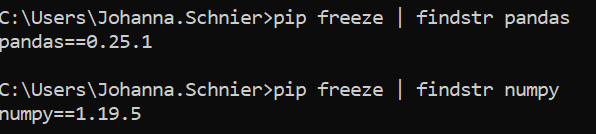

In [92]:
# We still need to load the modules
import pandas as pd # we abbreviate pandas with pd
import numpy as np # we abbreviate numpy with np

## 1. Series
Series are one possible input to dataframes. A series is a one-dimensional  array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The basic method to create a Series is to call: s = pd.Series(data, index). Here are some examples.

In [93]:
# We want our series to contain five random numbers
data = np.random.randn(5) # generates five random numbers
print(data)
# We want to index these data with the first five letters of the alphabet
index = ['a', 'b', 'c', 'd', 'e']
print(index)
# We use data and index to create the series
s = pd.Series(data, index)
print(s)

[-1.60032593  0.13267701 -0.18811927  0.55498453 -0.01275785]
['a', 'b', 'c', 'd', 'e']
a   -1.600326
b    0.132677
c   -0.188119
d    0.554985
e   -0.012758
dtype: float64


In [94]:
# We do not need to specify indices
s = pd.Series(data)
print(s)

0   -1.600326
1    0.132677
2   -0.188119
3    0.554985
4   -0.012758
dtype: float64


We can access specific entries by index:

In [95]:
s[0]

-1.6003259306028028

In [96]:
s[4]

-0.012757850603484272

We can manipulate series, e.g.:

In [97]:
s*2

0   -3.200652
1    0.265354
2   -0.376239
3    1.109969
4   -0.025516
dtype: float64

In [98]:
np.exp(s)

0    0.201831
1    1.141881
2    0.828516
3    1.741914
4    0.987323
dtype: float64

## 2. Dataframes
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. We refer to the first dimension as rows and the second dimension as columns. You can think of it as a spreadsheet. For example, you might want to collect the date of birth and the location of birth for the 20 students in this class. You can organize this data by creating 20 rows (one for each student) and three columns (name of student, date of birth, location of birth). Or, you are about to buy a car and you want to compare average prices across different car manufacturers. You can organize this information in a spreadsheet with one row for each car manufacturer and two columns with the name of the car manufacturer and the average price. The basic method to create a DataFrame is to call: df = pd.DataFrame(data). 'data' can come in many different forms, including lists, dictionaries, arrays and series - which we have just discussed in the previous section. Let us pick up the car example.

In [99]:
# We define a list of cars
cars = ['Honda', 'Toyota', 'Ford', 'Audi']
# We check whether cars is a list
print(type(cars))
# We create the dataframe
df = pd.DataFrame(cars)
df

<class 'list'>


,0
0,Honda
1,Toyota
2,Ford
3,Audi


In [100]:
# We define a Series of cars
cars = pd.Series(['Honda', 'Toyota', 'Ford', 'Audi'])
# We check whether cars is a list
print(type(cars))
# We create the dataframe
df = pd.DataFrame(cars)
df

<class 'pandas.core.series.Series'>


,0
0,Honda
1,Toyota
2,Ford
3,Audi


In [101]:
# We define an array of cars
cars = np.array(['Honda', 'Toyota', 'Ford', 'Audi'])
# We check whether cars is a list
print(type(cars))
# We create the dataframe
df = pd.DataFrame(cars)
df

<class 'numpy.ndarray'>


,0
0,Honda
1,Toyota
2,Ford
3,Audi


In [102]:
# We can also assign a column name
df = pd.DataFrame(cars, columns=['cars'])
df

,cars
0,Honda
1,Toyota
2,Ford
3,Audi


We can pass a second column to the dataframe:

In [103]:
df['price'] = ['1000', '2000', '3000', '4000']
df

,cars,price
0,Honda,1000
1,Toyota,2000
2,Ford,3000
3,Audi,4000


In [104]:
# We can access rows
df.iloc[0, :]

cars     Honda
price     1000
Name: 0, dtype: object

In [105]:
# We can access columns
df.iloc[:, 0]

0     Honda
1    Toyota
2      Ford
3      Audi
Name: cars, dtype: object

In [106]:
# We can access cells
df.iloc[0, 0]

'Honda'

In [107]:
# We can subset dataframes to a select number of columns
df_new = df[['cars']]
df_new

,cars
0,Honda
1,Toyota
2,Ford
3,Audi


In [108]:
# We can subset dataframes based on conditions
df_honda = df.loc[df['cars'] == 'Honda']
print(df_honda)

    cars price
0  Honda  1000


## 3. The Titanic Dataset
The full power of pandas becomes visible once we begin working with large(r) dataframes, i.e., with dataframes that consist of many rows and many columns. Throughout the remainder of this session, we will work with such a large(r) dataframe. We use data from the so-called Titantic challenge, which is an introductory Data Science Challenge posted on the platform kaggle.com. While the objective of this challenge is to predict who survives and dies on the Titanic, the dataset is still useful to illustrate the functionalities of pandas. For more information on the challenge, you might want to visit the kaggle.com platform.

In [109]:
# We load the data
# Go to the data folder in the repository and save the csv file 'titanic.csv' to your project folder
# Your path may be different from mine, so make sure to adjust the path
df_titanic = pd.read_csv('../python_basics_johanna/data/titanic.csv')

Here is an overview of the variables and their definitions:
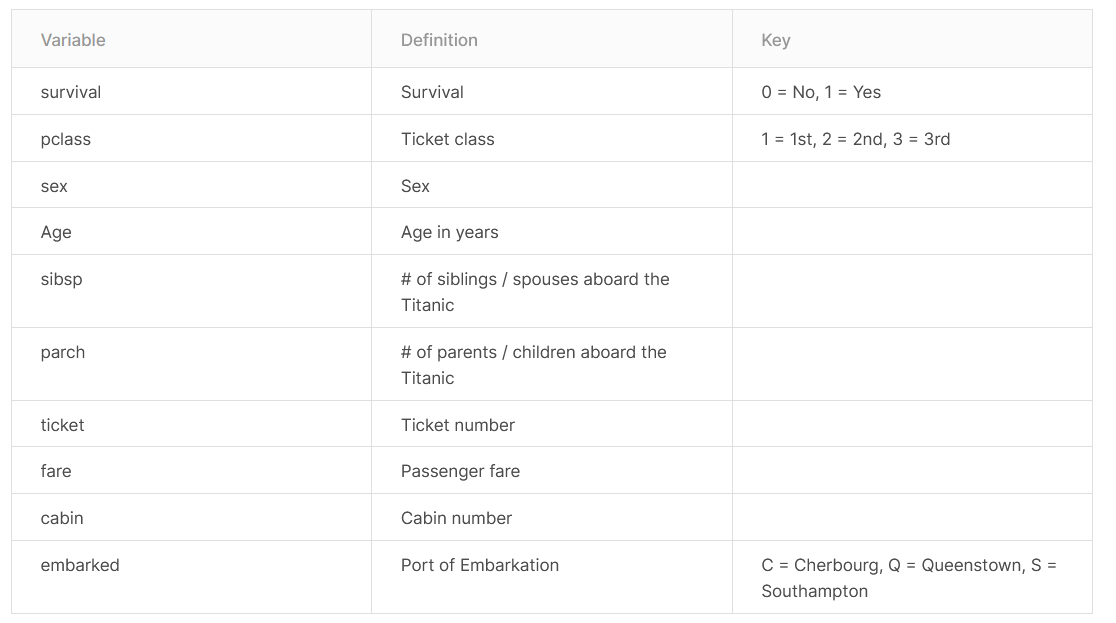

In [110]:
# Let's take a look at the columns of the dataframe
df_titanic.columns
# Let's check how many columns and rows there are
df_titanic.shape

(891, 12)

In [111]:
# Let's take a look at the data, e.g. at the first 10 rows ...
df_titanic.head(10)
# ... and the last 10 rows
df_titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [112]:
# Let's take a look at some meta information
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
# Let's take a look at some descriptive statistics
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Why does the above command return descriptive statistics for only a subset of the columns?

In [114]:
# We can filter data based on some criteria, e.g.: We are interested in those passengers who ...

# ... survived
df_surv = df_titanic.loc[df_titanic['Survived'] == 1]

# ... are younger than 30
df_young = df_titanic.loc[df_titanic['Age'] < 30]

# ... paid more than the mean of the fare
df_fare_mean = df_titanic.loc[df_titanic['Fare'] > df_titanic['Fare'].mean()]


# Modifying columns
We can modify existing columns. Suppose we want to convert the fare (in USD) into Euros (let's use the current exchange rate, which is approx. 1 Eur = 0.85 USD).

In [115]:
# Print the fare that the first passenger in the data paid
print('Fare in USD of first passenger: ' + str(df_titanic['Fare'][0]))
# Convert USD to Eur
df_titanic['Fare'] = df_titanic['Fare']*0.85
# Let's check again the fare of the first passenger
print('Fare in EUR of first passenger: ' + str(df_titanic['Fare'][0]))

Fare in USD of first passenger: 7.25
Fare in EUR of first passenger: 6.1625


In [116]:
# Let's take a look at some descriptive statistics
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,27.373577
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,42.239414
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,6.723840
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,12.286070
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,26.350000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,435.479820


Why does the above command return descriptive statistics for only a subset of the columns?

In [117]:
# ... mean/std. etc. can be computed for numeric columns only
df_titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

If we would like to have the mean/std. etc. for the 'Sex' column, we first need to convert it to a numeric (dummy) variable (binary variable, values 0 or 1)

In [118]:
df_titanic['Male'] = 1
df_titanic.loc[df_titanic['Sex'] != 'male', 'Male'] = 0

In [119]:
# Let's take another look at the .describe() command
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,27.373577,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,42.239414,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,6.723840,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,12.286070,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,26.350000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,435.479820,1.000000


# Adding columns based on existing ones
We can add columns. Suppose we would like to add another variable that captures whether a passenger is young or old, where we call passengers old if they are older than median age and young otherwise.

In [120]:
# Let's initalize a column 'young'
df_titanic['young'] = 0

# 'young' takes the value 1 if age is greater than median age, and 0 otherwise
df_titanic.loc[df_titanic['Age'] < df_titanic['Age'].median(), 'young'] = 1

# let's check how the variable 'young' looks like
print(df_titanic['young'].head(10))


0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: young, dtype: int64


## Descriptive statistics
Let us consider some descriptive statistics. Above, we already learned about the 'describe()' command, which produces off-the-shelf descriptive statistics.

In [121]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Male,young
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,27.373577,0.647587,0.378227
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,42.239414,0.477990,0.485217
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,6.723840,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,12.286070,1.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,26.350000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,435.479820,1.000000,1.000000


We might want to produce more nuanced descriptive statistics. Suppose we are interested in the relationship between age and likelihood of survival: Were young passengers more likely to survive, maybe because they were in better physical shape or because they were given priority in boats?

In [123]:
pd.crosstab(df_titanic['young'], df_titanic['Survived']).apply(lambda r: r/r.sum(), axis=1)

Survived,0,1
young,,
0,0.637184,0.362816
1,0.581602,0.418398


In [200]:
# What is the survival rate among the young vs. old passengers?
df_titanic.groupby('young')['Survived'].mean()

young
0    0.362816
1    0.418398
Name: Survived, dtype: float64

This is in line with our theorizing above: Survival rates among the young were a bit higher than those among the old. We might want to consider the relationship between age and survival chances in a more disaggregated manner. Let's take a look at the 'Age' variable (don't worry if you do not fully follow along the code for the visuals, we will cover visuals in the next session in more detail).

In [201]:
pip install seaborn # installs a visualization module

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'c:\users\johanna.schnier\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [202]:
import seaborn as sns # loads the module

c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


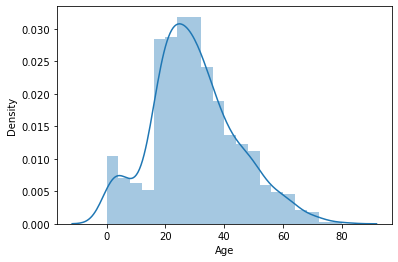

In [203]:
# round 'Age' variable
df_titanic['Age'] = df_titanic['Age'].round()
# distribution plot for 'Age'
sns.distplot(df_titanic['Age'])

In [204]:
# Mean Survival Rate for every age
df_age_surv = df_titanic.groupby('Age')['Survived'].mean().reset_index()
df_age_surv.head(10)

,Age,Survived
0,0.0,1.000000
1,1.0,0.846154
2,2.0,0.300000
3,3.0,0.833333
4,4.0,0.700000
5,5.0,1.000000
6,6.0,0.666667
7,7.0,0.333333
8,8.0,0.500000
9,9.0,0.250000


c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


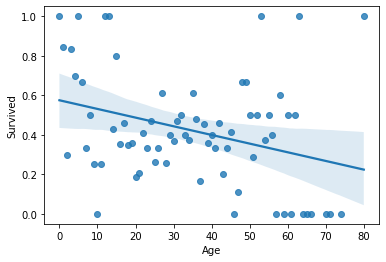

In [205]:
# Let's visualize the relationship between age and chances of survival
# Regression plot age and survival rate
sns.regplot(df_age_surv['Age'], df_age_surv['Survived'])

The regression line is downward sloping: On average, younger passengers tend to have greater chances of survival than older ones. This is contrary to our previous finding, which was based on the binary distinction between 'young' versus 'old' (and which probably was too crude).